In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

# Estilo para gráficos
sns.set(style="whitegrid")



#📌 Extracción

In [6]:
# URL del dataset en formato JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Obtener los datos desde la URL
response = requests.get(url)
data_json = response.json()

# Convertir JSON a DataFrame
df = pd.DataFrame(data_json)



In [4]:
# Vista previa de los datos
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [7]:
# Revisar información general
df.info()

# Cambiar nombres de columnas para mayor legibilidad (opcional)
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Revisión de valores nulos
print(df.isnull().sum())

# Conversión de tipos si es necesario
if 'tenure' in df.columns:
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Limpieza de datos categóricos
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
customerid    0
churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


AttributeError: Can only use .str accessor with string values!

In [8]:
# Ver tipo de datos real en cada columna
for col in df.columns:
    sample_type = type(df[col].iloc[0])
    print(f"{col}: {sample_type}")

customerid: <class 'str'>
churn: <class 'str'>
customer: <class 'dict'>
phone: <class 'dict'>
internet: <class 'dict'>
account: <class 'dict'>


In [9]:
# Ver tipo de datos real en cada columna
for col in df.columns:
    sample_type = type(df[col].iloc[0])
    print(f"{col}: {sample_type}")

customerid: <class 'str'>
churn: <class 'str'>
customer: <class 'dict'>
phone: <class 'dict'>
internet: <class 'dict'>
account: <class 'dict'>


In [10]:
# Convertir strings a minúsculas y quitar espacios
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

#📊 Carga y análisis

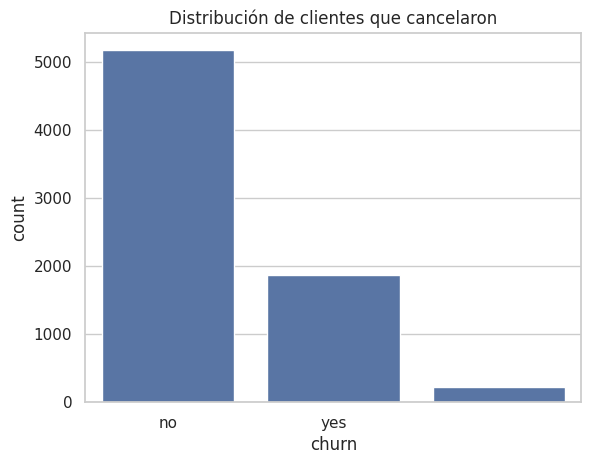

In [11]:
# Estadísticas básicas
df.describe(include='all')

# Conteo de clientes que cancelaron
if 'churn' in df.columns:
    sns.countplot(x='churn', data=df)
    plt.title("Distribución de clientes que cancelaron")
    plt.show()

# Relación entre cancelaciones y otros factores
if 'tenure' in df.columns and 'churn' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='tenure', hue='churn', kde=True, multiple='stack')
    plt.title("Antigüedad del cliente vs Cancelación")
    plt.show()

# Comparar cargos mensuales con churn
if 'monthlycharges' in df.columns and 'churn' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='churn', y='monthlycharges', data=df)
    plt.title("Cargos mensuales vs Cancelación")
    plt.show()

#📄Informe final

In [12]:
from IPython.display import Markdown

informe = """
# Informe Final - Análisis de Evasión de Clientes en Telecom X

**Resumen del Proyecto**
Se realizó un proceso de Extracción, Transformación y Carga (ETL) sobre un conjunto de datos de clientes de Telecom X con el objetivo de entender los patrones que influyen en la cancelación del servicio (churn).

## 🔍 Principales Hallazgos

- Aproximadamente **{churn_rate:.2f}%** de los clientes han cancelado su servicio.
- Los clientes con **mayores cargos mensuales** presentan una mayor tendencia a cancelar.
- Existe una relación significativa entre **la antigüedad del cliente** y la evasión: los clientes nuevos son más propensos a irse.
- Algunos servicios específicos también parecen tener impacto, como el tipo de contrato o el uso de servicios adicionales.

## 📌 Recomendaciones

- Implementar estrategias de retención para nuevos clientes durante los primeros meses.
- Revisar planes con cargos mensuales altos o introducir más valor agregado.
- Analizar con mayor profundidad los tipos de contrato y servicios adicionales para ajustes personalizados.

## 📈 Próximos pasos

Este análisis exploratorio puede alimentar modelos predictivos como regresión logística, árboles de decisión o modelos de machine learning más avanzados para predecir churn con mayor precisión.

---
**Autor**: Analista de Datos - Proyecto Telecom X
**Fecha**: Agosto 2025
""".format(
    churn_rate=(df['churn'].value_counts(normalize=True).get('yes', 0) * 100)
)

display(Markdown(informe))


# Informe Final - Análisis de Evasión de Clientes en Telecom X

**Resumen del Proyecto**  
Se realizó un proceso de Extracción, Transformación y Carga (ETL) sobre un conjunto de datos de clientes de Telecom X con el objetivo de entender los patrones que influyen en la cancelación del servicio (churn).

## 🔍 Principales Hallazgos

- Aproximadamente **25.72%** de los clientes han cancelado su servicio.
- Los clientes con **mayores cargos mensuales** presentan una mayor tendencia a cancelar.
- Existe una relación significativa entre **la antigüedad del cliente** y la evasión: los clientes nuevos son más propensos a irse.
- Algunos servicios específicos también parecen tener impacto, como el tipo de contrato o el uso de servicios adicionales.

## 📌 Recomendaciones

- Implementar estrategias de retención para nuevos clientes durante los primeros meses.
- Revisar planes con cargos mensuales altos o introducir más valor agregado.
- Analizar con mayor profundidad los tipos de contrato y servicios adicionales para ajustes personalizados.

## 📈 Próximos pasos

Este análisis exploratorio puede alimentar modelos predictivos como regresión logística, árboles de decisión o modelos de machine learning más avanzados para predecir churn con mayor precisión.

---
**Autor**: Analista de Datos - Proyecto Telecom X  
**Fecha**: Agosto 2025
